In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sqlite3 import connect

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 5: Гистограмма**

В предыдущем задании вы визуализировали распределение, вручную группируя значения с помощью библиотеки Pandas. Было бы полезно как-то автоматизировать эту задачу? Нет ничего проще.

Но для этого нам нужно использовать другой тип визуализации данных — гистограмму. На этот раз вместо средних значений мы будем использовать абсолютные значения числа коммитов и сравним их в рабочие и выходные дни.

Выполните необходимые шаги по созданию следующего графика:

1.   Анализируйте только пользователей, а не администраторов.
2.   Используйте фильтр status = 'ready' для коммитов.
3.   Создайте два списка значений (для рабочих дней и для выходных) в качестве входных данных для гистограммы.
4.   Размер figsize остается прежним; размер шрифта и цветовую палитру выбирайте по своему вкусу.
5.   Используйте уровень прозрачности 0,7 для переднего слоя гистограммы.

In [59]:
conn = connect('/content/drive/MyDrive/Школа 21/DS_project 12 Pandas, SQL, визуализация данных/checking-logs.sqlite')

In [60]:
sql_command = '''
SELECT
    timestamp AS commit_time    
FROM
    checker
WHERE
     status = 'ready'
     and uid like 'user_%'    
'''

In [61]:
df = pd.read_sql(sql_command, conn, parse_dates=['commit_time'])
df.head()

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   commit_time  1686 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.3 KB


In [63]:
df['hour'] = df['commit_time'].dt.hour
df['weekday'] = df['commit_time'].dt.weekday.apply(lambda x: 'weekend' if x > 4 else 'working_day')
df = df.drop(columns='commit_time')
df

,hour,weekday
0,5,working_day
1,5,working_day
2,5,working_day
3,5,working_day
4,5,working_day
...,...,...
1681,20,working_day
1682,20,working_day
1683,20,working_day
1684,20,working_day


In [64]:
df_working_day = df[df.weekday == 'working_day']
df_working_day.head()

,hour,weekday
0,5,working_day
1,5,working_day
2,5,working_day
3,5,working_day
4,5,working_day


In [65]:
df_weekend = df[df.weekday == 'weekend']
df_weekend.head()

,hour,weekday
13,7,weekend
14,13,weekend
15,13,weekend
16,13,weekend
17,13,weekend


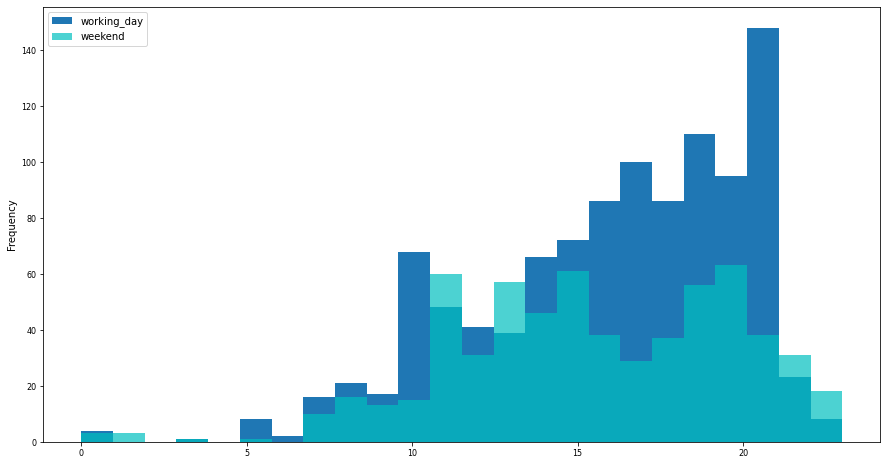

In [91]:
df_weekend.plot(
          kind='hist',
          bins=24,
          fontsize=8,
          figsize=(15,8),
          alpha=0.7,
          xlabel='hour',
          color=['c', 'orange'],
          ax = df_working_day.plot.hist(bins=24)) 
plt.legend(['working_day', 'weekend'], loc='upper left')
plt.show()

**4. Закройте соединение.**

In [67]:
conn.close()

**6. В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос:**

**«Существуют ли часы, когда общее количество коммитов было выше в выходные дни, чем в рабочие?». В своем ответе приведите примеры с 4 наибольшими значениями.**

**Да, существуют: 11, 13, 22, 23 часа**